# A Comparison of MSP Payments in 2010/2011 and 2020/2021 Fiscal Year

## Introduction

In Canada, public health insurance is available to eligible residents. Canadian citizens and permanent residents can apply for provincial health insurance. In British Columbia, public health insurance is called Medical Services Plan (MSP). It covers the cost of medically-necessary insured doctor services (Ministry of Health, 2021). 

BC Medical Services Plan's (MSP) annual financial statements include a detailed listing of total annual payments to all practitioners and organizations ((Compensation Policy and Programs, 2022). 
The data is obtained from BC government website. The first column “Payments to Practitioners” refers to the names of enrolled medical practitioners. The second column “Amount” refers to the amount of money (in CAD) paid by the MSP program. The third column “Fiscal Year” refers to the year of payments. The dataset covers the payments from 2010-11 to 2020-21 (Compensation Policy and Programs, 2022).

According to data from the BC government website, the total annual payments to all practitioners and organizations in British Columbia may be increased over the study period. This can be factored into increases attributable to changes in the age structure of the population, general population growth and age-specific increases in per-capita use (Barer et al., 1989). Our objective is to compare the BC Medical Services Plan’s  (MSP) annual financial payment in 2010/2011 and 2020/2021 Fiscal Year. We will use the median value of the total amount in 2010/11 and 2020/21 to make a comparison. In addition, the scale parameter of standard deviation can show how to spread out.

## Preliminary Results

Before getting started with our data, we run the next code block to load the packages we need.

In [3]:
# Run this cell before continuing.
library(cowplot)
library(datateachr)
library(infer)
library(repr)
library(tidyverse)

library(digest)
library(broom)
library(digest)
library(testthat)

Firstly, we read our data using `read_csv()`. To make sure that our data is tidy, we rename two columnn names before filtering out some rows that are summarizing data.

In [4]:
msp_data <- read_csv("data/msp_data.csv") %>%
    rename("Fiscal_Year" = "Fiscal Year", "Payments_to_Practitoners" = "Payments to Practitioners") %>%
    filter(!grepl("Total Expenditures|Out of Province Payments|Reciprocal Agreements Recoveries|Under Threshold", 
             Payments_to_Practitoners, ignore.case = TRUE))
head(msp_data)

Rows: 121282 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Payments to Practitioners, Fiscal Year


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Payments_to_Practitoners,Amount,Fiscal_Year
<chr>,<dbl>,<chr>
"Aartsma, Durk Pieter",265138.74,2020/2021
"Abayomi, Michael Ayotunde",557779.95,2020/2021
"Abbas, Wea'am",95487.34,2020/2021
"Abbey, Mark Douglas",96681.08,2020/2021
"Abbott, Breanne",352280.26,2020/2021
"Abbott, Salome",166357.84,2020/2021


Next, since we are evaluating MSP Payments in 2010/2011 and 2020/2021 Fiscal Year, now we will make two subsets of these two years' data with column `Amount` and `Fiscal_Year` respectively using `filter()` and `select()`.

In [5]:
msp_2010 <- msp_data %>% 
filter(Fiscal_Year == "2010/2011") %>% 
select(Amount, Fiscal_Year)
head(msp_2010)


Amount,Fiscal_Year
<dbl>,<chr>
166795.05,2010/2011
158640.24,2010/2011
253671.34,2010/2011
39453.09,2010/2011
665578.29,2010/2011
159894.54,2010/2011


In [6]:
msp_2020 <- msp_data %>% 
filter(Fiscal_Year == "2020/2021") %>% 
select(Amount, Fiscal_Year)
head(msp_2020)

Amount,Fiscal_Year
<dbl>,<chr>
265138.74,2020/2021
557779.95,2020/2021
95487.34,2020/2021
96681.08,2020/2021
352280.26,2020/2021
166357.84,2020/2021


Then, we make histogram plots of these two subsets. Since we are comparing payments in this project, we will use `scale_x_continuous(labels = scales::dollar_format(), limits = c(0, 1000000)) ` to only plot the data that has the amount between 0 and 1,000,000.

Warning message:
“Removed 163 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


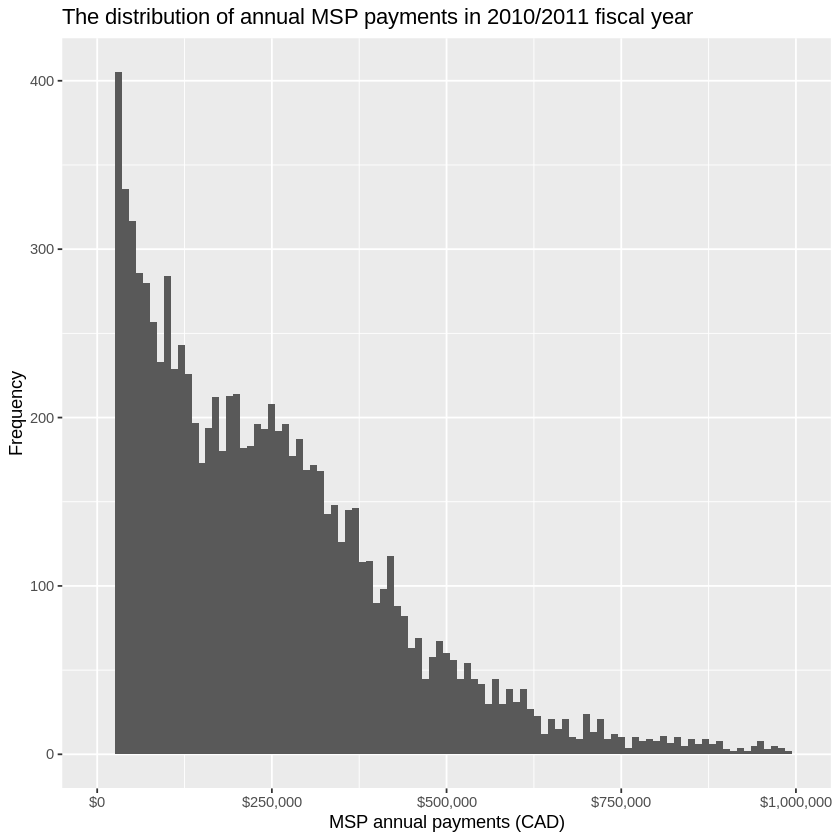

In [7]:
msp_2010_plot <- msp_2010 %>%
ggplot(aes(x = Amount)) + 
    geom_histogram(binwidth = 10000) +
    labs(x = "MSP annual payments (CAD)", y = "Frequency") +
    ggtitle("The distribution of annual MSP payments in 2010/2011 fiscal year") +
    scale_x_continuous(labels = scales::dollar_format(), limits = c(0, 1000000)) 
msp_2010_plot

Warning message:
“Removed 262 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


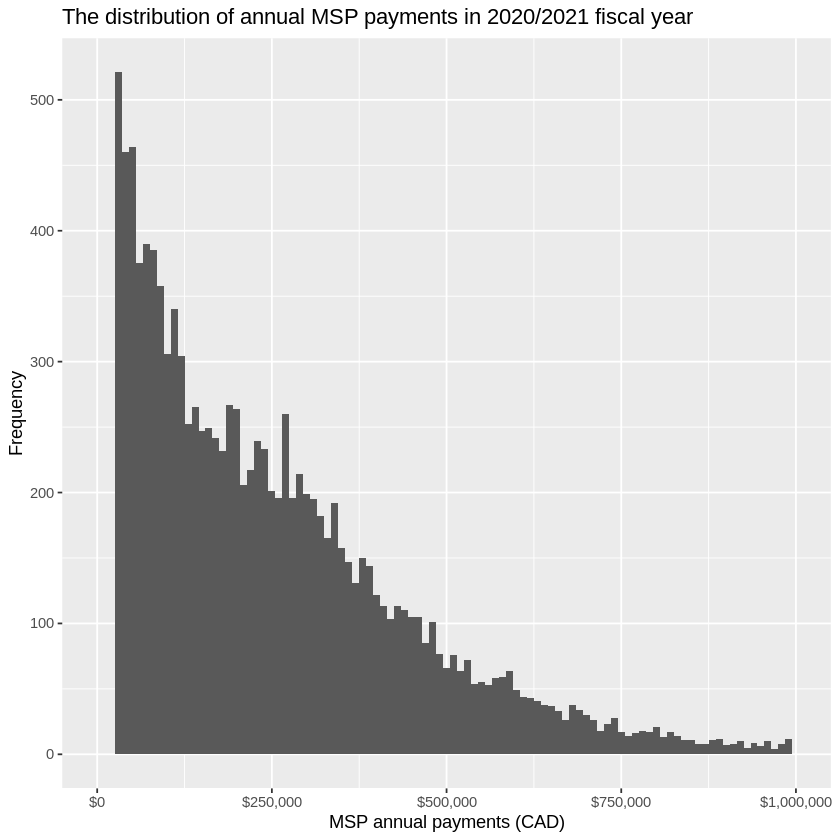

In [8]:
msp_2020_plot <- msp_2020 %>%
ggplot(aes(x = Amount)) + 
    geom_histogram(binwidth = 10000) +
    labs(x = "MSP annual payments (CAD)", y = "Frequency") +
    ggtitle("The distribution of annual MSP payments in 2020/2021 fiscal year") +
    scale_x_continuous(labels = scales::dollar_format(), limits = c(0, 1000000)) 
msp_2020_plot

To get a better idea of the data, we use `summary()` to get some statistics about these two subsets and and the `median` value to the plots we create above.

In [9]:
summary_2010 <- summary(msp_2010$Amount)

summary_2010

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    25025    103890    219770    372321    353332 176040137 

In [10]:
#remove outliers (2010/2011)

Q_2010 <- quantile(msp_2010$Amount, probs=c(.25, .75))
iqr_2010 <- IQR(msp_2010$Amount)

up_2010 <-  Q_2010[2]+1.5*iqr_2010 # Upper Range  
low_2010 <- Q_2010[1]-1.5*iqr_2010 # Lower Range

msp_2010_outliers_rm<- subset(msp_2010, msp_2010$Amount > low_2010 & msp_2010$Amount < up_2010)


# head(msp_2010_outliers_rm)
# boxplot(msp_2010_outliers_rm$Amount)
summary(msp_2010_outliers_rm$Amount)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  25025  100605  209877  235274  335302  727169 

In [11]:
summary_2020 <- summary(msp_2020$Amount)
summary_2020

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-30423700     98383    215275    418224    370381 273985446 

In [12]:
#remove outliers (2020/2021)

Q_2020 <- quantile(msp_2020$Amount, probs=c(.25, .75))
iqr_2020 <- IQR(msp_2020$Amount)

up_2020 <-  Q_2020[2]+1.5*iqr_2010 # Upper Range  
low_2020 <- Q_2020[1]-1.5*iqr_2010 # Lower Range

msp_2020_outliers_rm<- subset(msp_2020, msp_2020$Amount > low_2020 & msp_2020$Amount < up_2020)


# head(msp_2020_outliers_rm)
# boxplot(msp_2020_outliers_rm$Amount)
summary(msp_2020_outliers_rm$Amount)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  25001   94161  202615  238695  343170  744230 

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


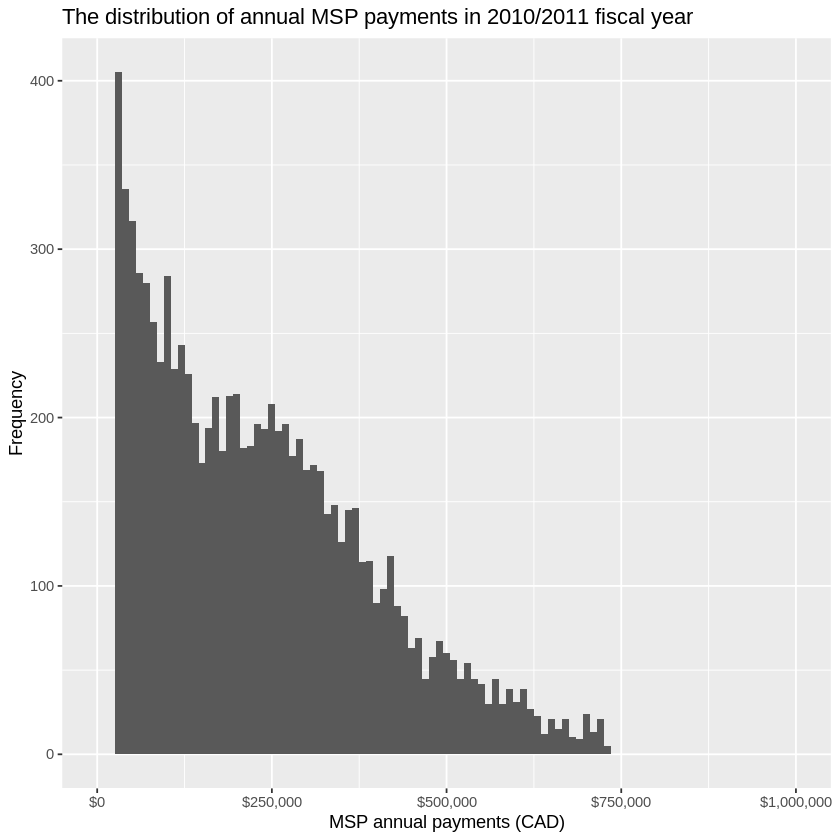

In [13]:
msp_2010_outliers_rm_plot <- msp_2010_outliers_rm %>%
ggplot(aes(x = Amount)) + 
    geom_histogram(binwidth = 10000) +
    labs(x = "MSP annual payments (CAD)", y = "Frequency") +
    ggtitle("The distribution of annual MSP payments in 2010/2011 fiscal year") +
    scale_x_continuous(labels = scales::dollar_format(), limits = c(0, 1000000)) 
msp_2010_outliers_rm_plot

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


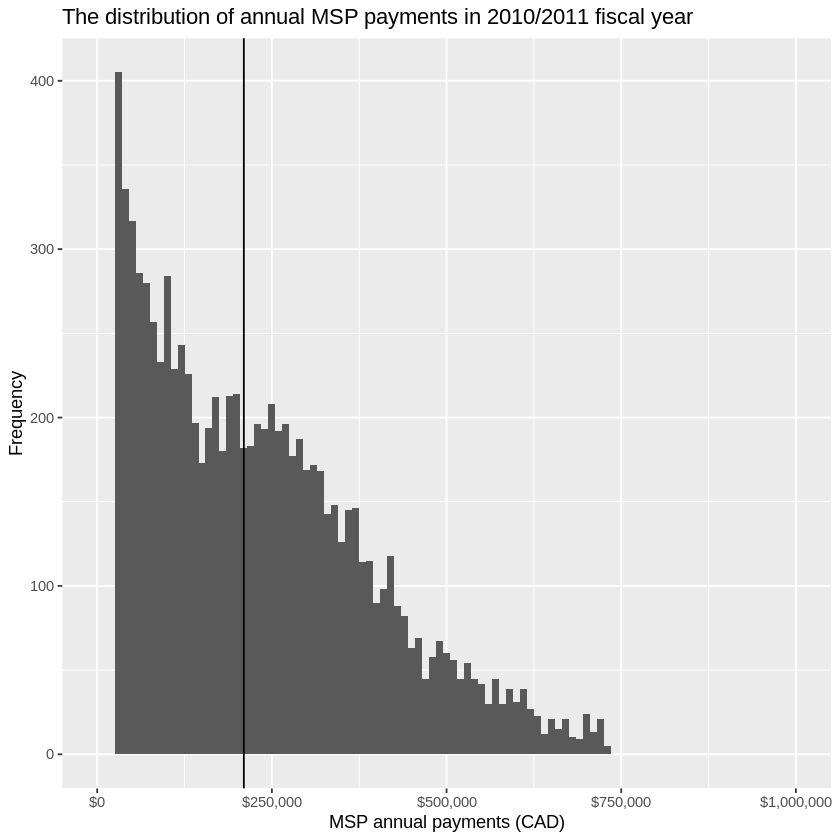

In [14]:
msp_2010_outliers_rm_plot + geom_vline(xintercept = median(msp_2010_outliers_rm$Amount))

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


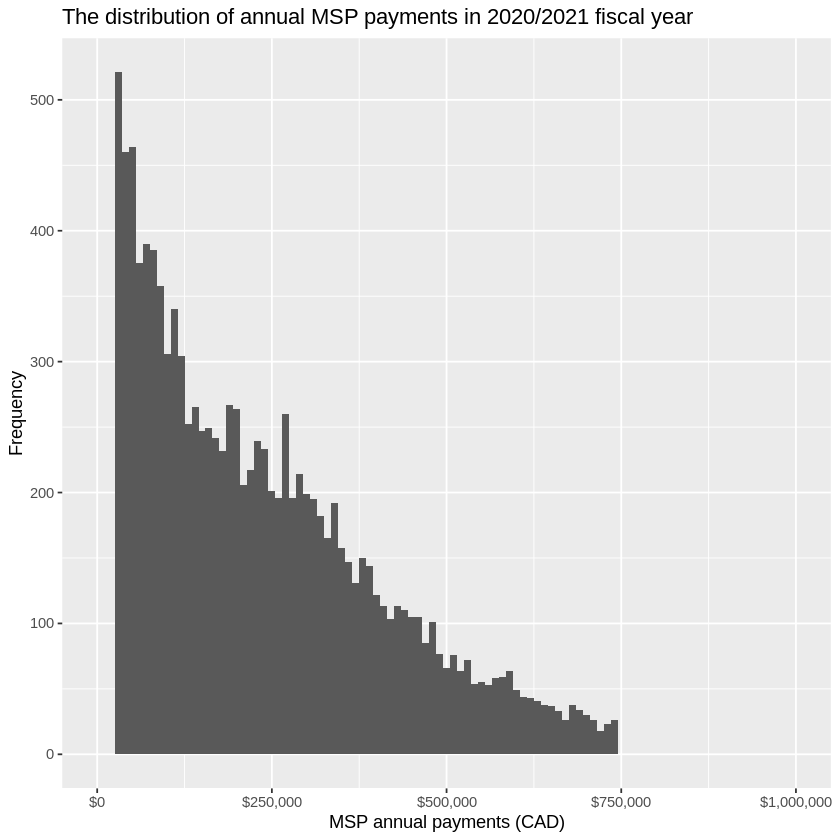

In [15]:
msp_2020_outliers_rm_plot <- msp_2020_outliers_rm %>%
ggplot(aes(x = Amount)) + 
    geom_histogram(binwidth = 10000) +
    labs(x = "MSP annual payments (CAD)", y = "Frequency") +
    ggtitle("The distribution of annual MSP payments in 2020/2021 fiscal year") +
    scale_x_continuous(labels = scales::dollar_format(), limits = c(0, 1000000)) 
msp_2020_outliers_rm_plot

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


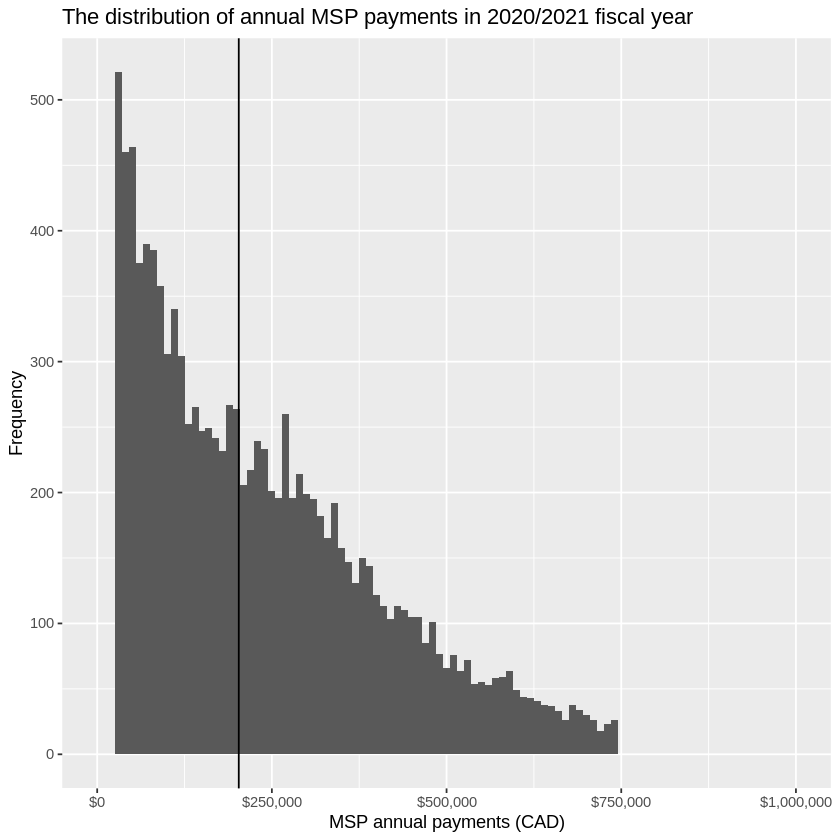

In [16]:
msp_2020_outliers_rm_plot + geom_vline(xintercept = median(msp_2020_outliers_rm$Amount))

## Methods and Results

### Expected Outcomes
We will take a simple random sample of  from the dataset of the time 2010/2011 and 2020/2021. Then we estimate the mean of payment for both time periods and construct confidence interval. After that, we will compare the estimates to the true parameters of the population and discuss whether our samples are representative.
Additionally, we compare the bootstrapping and asymptotics method using the samples above. 
We also want to find out whether the MSP payments to practitioners has changed from 2010/2011 to 2020/2021 by conducting a two-sided hypothesis test. 

### Impact of findings
We will find out whether the medical practitioners recieved more or less money from the MSP program. Do they get more paid or less paid from the MSP program during the pandemic? 

### Future questions
Information from the dataset is quite limited, only with names, payments, and time. Hence, we cannot make further analysis regarding other factors, for example, ages, genders, areas of expertise, etc. We will discuss this in details in the final report.


# Asymptotic Method: Central Limit Theorem

In [23]:
#We use the data from 2010/2011

length(msp_2010_outliers_rm$Amount)
pop_mean <- mean(msp_2010_outliers_rm$Amount)
pop_median <- median(msp_2010_outliers_rm$Amount)
# 9134

#We choose the sample size of 1000, which is approximately 10% of the population
set.seed(1000)
samples_msp_2010 <- 
    msp_2010_outliers_rm %>% 
    rep_sample_n(size = 1000, reps = 1000)

[1] 9134

In [24]:
#Sample means, sample standard deviations, lower bound and upper bound for confidence interval, and whether the true population mean:
samples_means_msp_2010 <-
    samples_msp_2010 %>% 
    group_by(replicate) %>% 
    summarise(sample_mean = mean(Amount),
              sample_sd = sd(Amount),
              lower_bound = sample_mean-qnorm(0.95,lower.tail = TRUE)*sample_sd/sqrt(1000),
              upper_bound = sample_mean+qnorm(0.95,lower.tail = TRUE)*sample_sd/sqrt(1000),
              captured = (lower_bound <= pop_mean & pop_mean <= upper_bound), `.groups` = "drop")
head(samples_means_msp_2010)

mean(samples_means_msp_2010$captured)

replicate,sample_mean,sample_sd,lower_bound,upper_bound,captured
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,239760.0,162267.1,231319.7,248200.3,TRUE
2,234599.0,155839.6,226493.0,242705.0,TRUE
3,239188.3,158330.5,230952.8,247423.9,TRUE
4,227314.8,153184.9,219346.9,235282.7,TRUE
5,226072.7,150640.8,218237.2,233908.3,FALSE
6,229947.4,158959.5,221679.2,238215.7,TRUE


[1] 0.92

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



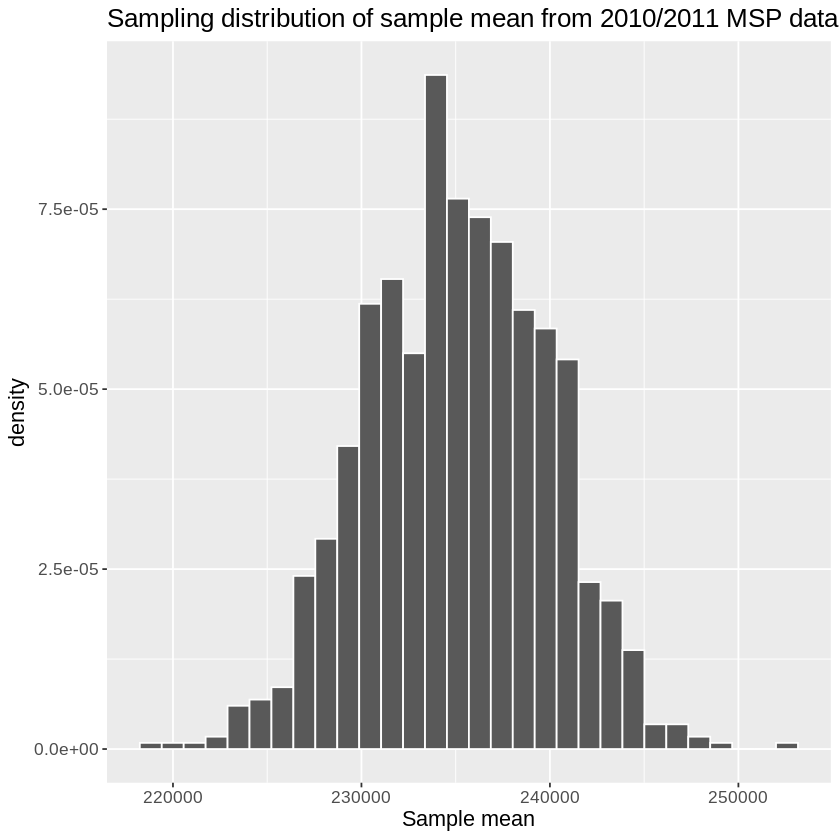

In [25]:
sampling_dist_msp_mean_2010 <-
    samples_means_msp_2010 %>% 
    ggplot() + 
    geom_histogram(aes(x = sample_mean, y = ..density..), color="white") +
    theme(text = element_text(size = 13))+
    xlab("Sample mean") +
    ggtitle("Sampling distribution of sample mean from 2010/2011 MSP data") 

sampling_dist_msp_mean_2010

In [26]:
#Sample medians:
samples_medians_msp_2010 <-
    samples_msp_2010 %>% 
    group_by(replicate) %>% 
    summarise(sample_median = median(Amount),
              sample_sd = sd(Amount),
              lower_bound = sample_median-qnorm(0.95,lower.tail = TRUE)*sample_sd/sqrt(1000),
              upper_bound = sample_median+qnorm(0.95,lower.tail = TRUE)*sample_sd/sqrt(1000),
              captured = (lower_bound <= pop_median & pop_median <= upper_bound), `.groups` = "drop")
head(samples_medians_msp_2010)

mean(samples_medians_msp_2010$captured)


replicate,sample_median,sample_sd,lower_bound,upper_bound,captured
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,221815.0,162267.1,213374.7,230255.3,FALSE
2,207154.6,155839.6,199048.6,215260.5,TRUE
3,217692.7,158330.5,209457.2,225928.2,TRUE
4,207830.6,153184.9,199862.7,215798.5,TRUE
5,203381.3,150640.8,195545.8,211216.9,TRUE
6,205756.8,158959.5,197488.5,214025.0,TRUE


[1] 0.709

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



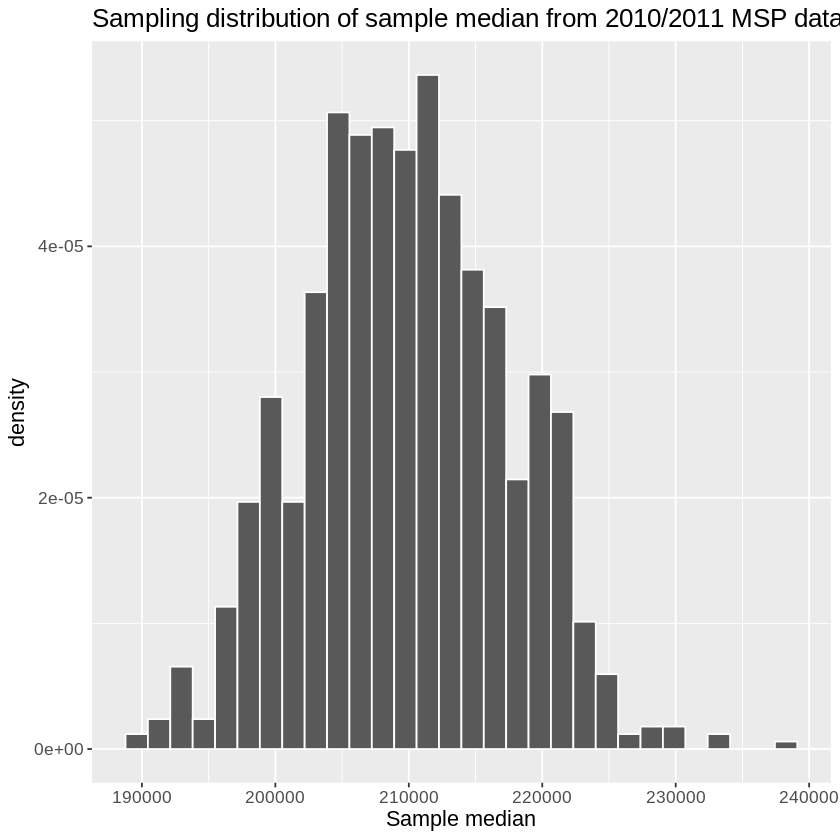

In [27]:
sampling_dist_msp_median_2010 <-
    samples_medians_msp_2010 %>% 
    ggplot() + 
    geom_histogram(aes(x = sample_median, y = ..density..), color="white") +
    theme(text = element_text(size = 13))+
    xlab("Sample median") +
    ggtitle("Sampling distribution of sample median from 2010/2011 MSP data") 
sampling_dist_msp_median_2010

# Bootstrapping

replicate,bootstrap_median,bootstrap_sd
<int>,<dbl>,<dbl>
1,224449.2,671812.1
2,215783.6,600136.8
3,213980.5,659272.1
4,218470.6,640522.0
5,214386.9,644794.7
6,228185.8,852899.6


replicate,ci_lower,ci_upper
<int>,<dbl>,<dbl>
1,189472.6,259425.8
2,184538.6,247028.6
3,179656.8,248304.3
4,185123.1,251818.2
5,180816.8,247956.9
6,183781.2,272590.4


replicate,ci_lower,ci_upper,captured
<int>,<dbl>,<dbl>,<lgl>
1,189472.6,259425.8,TRUE
2,184538.6,247028.6,TRUE
3,179656.8,248304.3,TRUE
4,185123.1,251818.2,TRUE
5,180816.8,247956.9,TRUE
6,183781.2,272590.4,TRUE


[1] 0.996

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



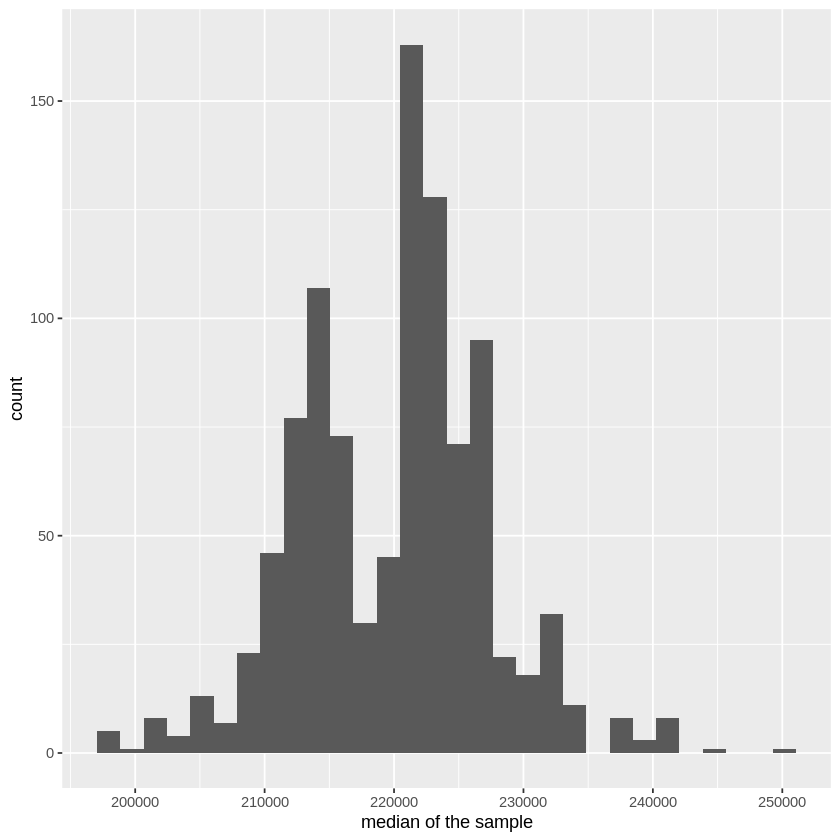

In [28]:
set.seed(1000)
pop_median <- msp_2010 %>%
    pull(Amount) %>% 
    median()
## find the original sample 
msp_2010_sample <- msp_2010 %>%
rep_sample_n(size = 1000, replace = FALSE)

## find the sample's bootstrap
msp_2010_bootstrap <- msp_2010_sample %>%
rep_sample_n (size = 1000, reps = 1000, replace = TRUE) %>%
group_by(replicate) %>%
summarize(bootstrap_median= median (Amount),
         bootstrap_sd = sd(Amount))
head(msp_2010_bootstrap)

##
intervals <- 
    msp_2010_bootstrap %>% 
    group_by (replicate) %>%
    summarize(ci_lower = bootstrap_median - qt(0.95,999,lower.tail = TRUE)*bootstrap_sd/sqrt(1000),
              ci_upper = bootstrap_median + qt(0.95,999,lower.tail = TRUE)*bootstrap_sd/sqrt(1000))
head(intervals)

intervals_captured <- 
    intervals %>% 
    mutate(captured = (ci_lower <= pop_median & pop_median <= pop_median))
head(intervals_captured)

mean(intervals_captured$captured)

bootstrap_figure <- msp_2010_bootstrap %>%
ggplot(aes(x = bootstrap_median)) +
geom_histogram() +
xlab("median of the sample")
bootstrap_figure

# Hypothesis Test

In [34]:
msp_rm_outliers <- rbind(msp_2010_outliers_rm,msp_2020_outliers_rm)


In [35]:
msp_summary <- msp_rm_outliers%>%
                group_by(Fiscal_Year) %>%
                summarise(median = median(Amount),
                         var = var(Amount),
                          sd = sd(Amount),
                         n = n())
head(msp_summary)

Fiscal_Year,median,var,sd,n
<chr>,<dbl>,<dbl>,<dbl>,<int>
2010/2011,209877.2,25232880737,158848.6,9134
2020/2021,202615.4,28968160426,170200.4,11707


In [36]:
test_statistic <- (msp_summary$median[2] - msp_summary$median[1]) / 
    sqrt(msp_summary$var[2]/msp_summary$n[2] 
         + msp_summary$var[1]/msp_summary$n[1])
test_statistic

[1] -3.173239

In [38]:
msp_t_test <- 
    tidy(t.test(msp_rm_outliers %>% filter(Fiscal_Year == "2010/2011") %>% pull(Amount),
           msp_rm_outliers %>% filter(Fiscal_Year == "2020/2021") %>% pull(Amount)))

msp_t_test

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-3420.746,235274.4,238695.1,-1.494794,0.1349838,20186.01,-7906.273,1064.781,Welch Two Sample t-test,two.sided


## References

Barer, M. L., Pulcins, I. R., Evans, R. G., Hertzman, C., Lomas, J., & Anderson, G. M. (1989). Trends in use of medical services by the elderly in British Columbia. CMAJ: Canadian Medical Association Journal, 141(1), 39.
Compensation Policy and Programs. (2022, February 8). MSP Blue Book . Retrieved February 21, 2022, from https://catalogue.data.gov.bc.ca/dataset/c7413d9f-112e-4a26-bbd1-ae2711856629.

G, K., Steinmetz, S., & de Vries, D. H. (2014, April 23). Should I stay or should I go? The impact of working time and wages on retention in the health workforce - Human Resources for Health. Human Resources for Health. Retrieved March 5, 2022, from https://human-resources-health.biomedcentral.com/articles/10.1186/1478-4491-12-23

Ministry of Health. (2021, July 29). Medical services plan. Province of British Columbia. Retrieved February 22, 2022, from https://www2.gov.bc.ca/gov/content/health/practitioner-professional-resources/msp

Wranik, D. W., & Durier-Copp, M. (2010). Physician remuneration methods for family physicians in Canada: expected outcomes and lessons learned. Health Care Analysis, 18(1), 35-59.

# Questions

1. Set seed: 
    CLT: multiple samples from population; Bootstrap: one sample from population. Is it necessary to set the same seed?

2. Median or Mean:
    Data skewed. But can we use median in CLT?
  
3. Comparing Asymptotic method and Bootstrap:
    How to tell which is better? The proportion of capturing true parameter?
    Using median, CLT is around 70%, bootstrap is almost 100%
    
4. Sample or Population:
    We treat the dataset as population and take samples from it when doing comparison. Can we treat it as a sample in hypothesis test? If not, should we estimate the parameter using the better between CLT and bootstrap? Or can we just take a simple random sample to perform the test?
    
